In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")

## Importing data

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')


print(train.shape)
train.head()

(1117957, 22)


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [3]:
sample_sub=pd.read_csv("/kaggle/input/playground-series-s4e5/sample_submission.csv")
print(sample_sub.shape)
sample_sub.head()

(745305, 2)


,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5


## EDA

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [5]:
train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [6]:
def plot_numerics(data, cols):
    # Plotting histograms and box plots for each column
    for col in cols:
        _, ax = plt.subplots(1,2, figsize=(16, 5))
        ax=ax.flatten()

        # Histogram
        sns.histplot(data[col], bins=50, kde=True, color='skyblue', ax=ax[0])
        ax[0].set_title(f'Histogram of {col}', fontsize=15,fontweight='bold')
        ax[0].set_xlabel(col, fontsize=12)
        ax[0].set_ylabel('Frequency', fontsize=12)

        # Box plot
        sns.boxplot(x=data[col], color='lightgreen', ax=ax[1])
        ax[1].set_title(f'Box plot of {col}', fontsize=15,fontweight='bold')
        ax[1].set_xlabel(col, fontsize=12)

        plt.tight_layout()
        plt.show()
        
def get_count_plot(cat):
    ax=sns.countplot(x=df_train[cat],
                   order=df_train[cat].value_counts(ascending=False).index);
        
    abs_values = df_train[cat].value_counts(ascending=False)
    rel_values = df_train[cat].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title("Distribution of "+cat+" Values",fontsize=16)

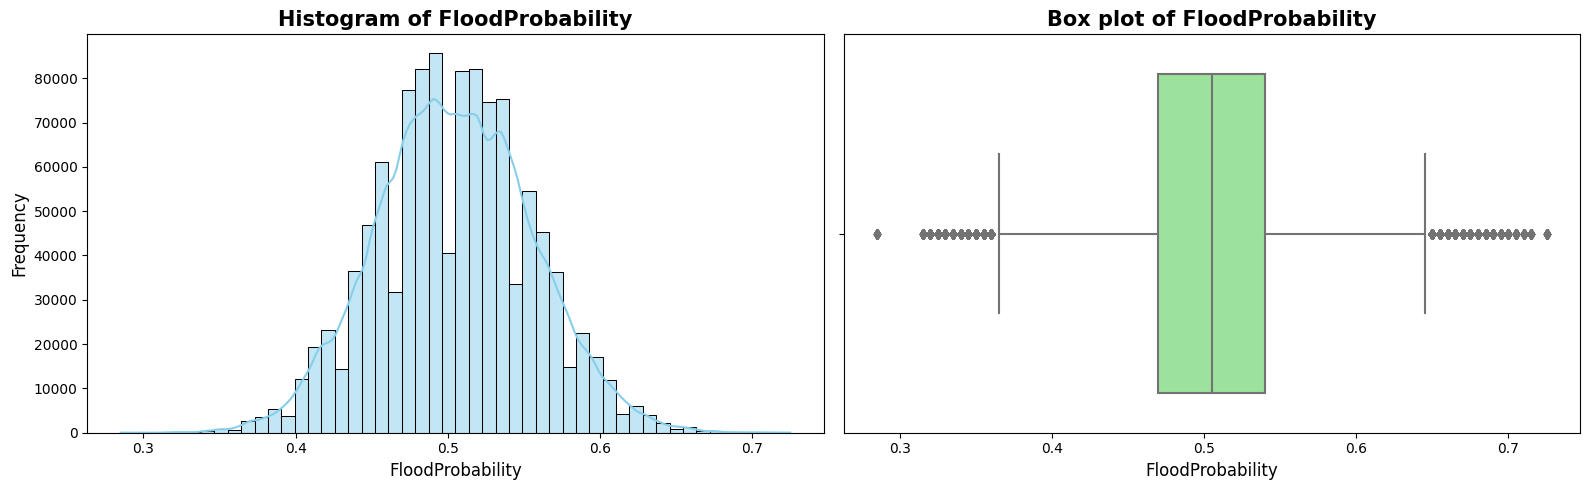

In [7]:
plot_numerics(train, ['FloodProbability'])

In [8]:
cols = train.columns.to_list()
cols.pop(0) # drop 'id'
cols.pop(-1) # drop 'FloodProbability'

'FloodProbability'

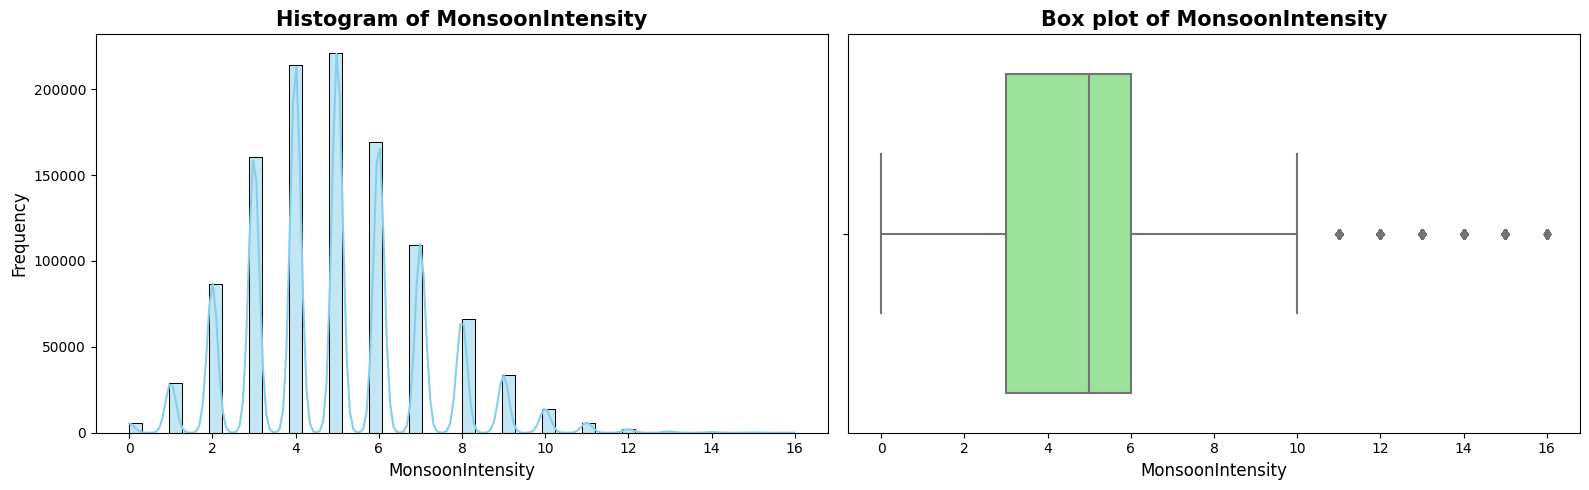

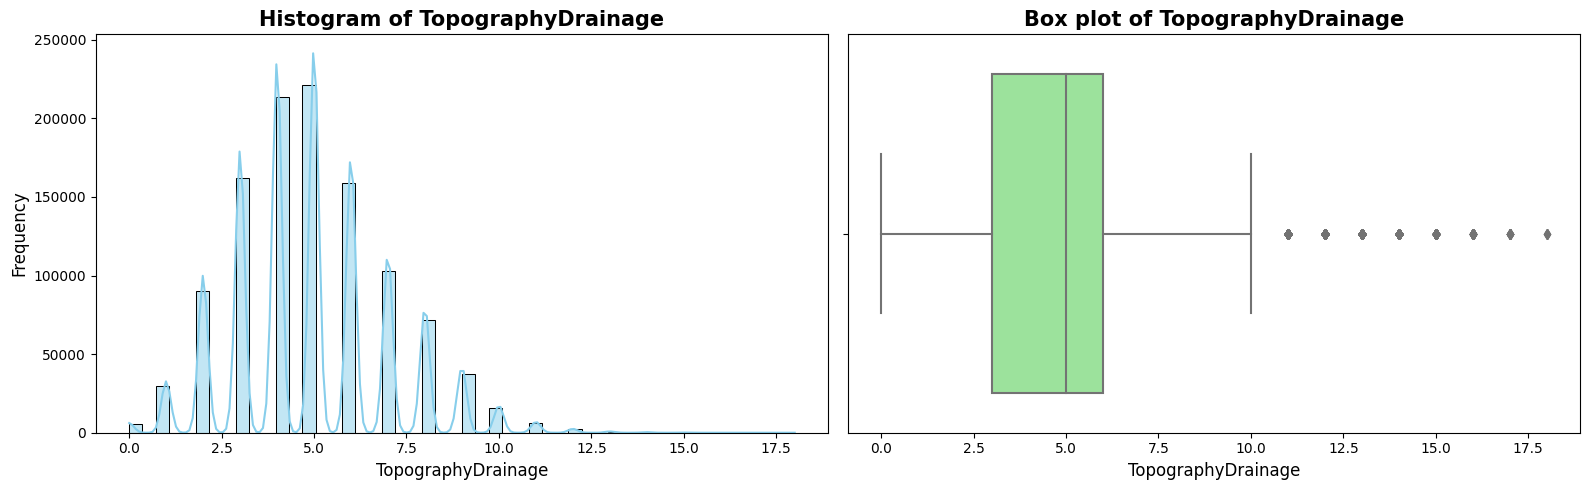

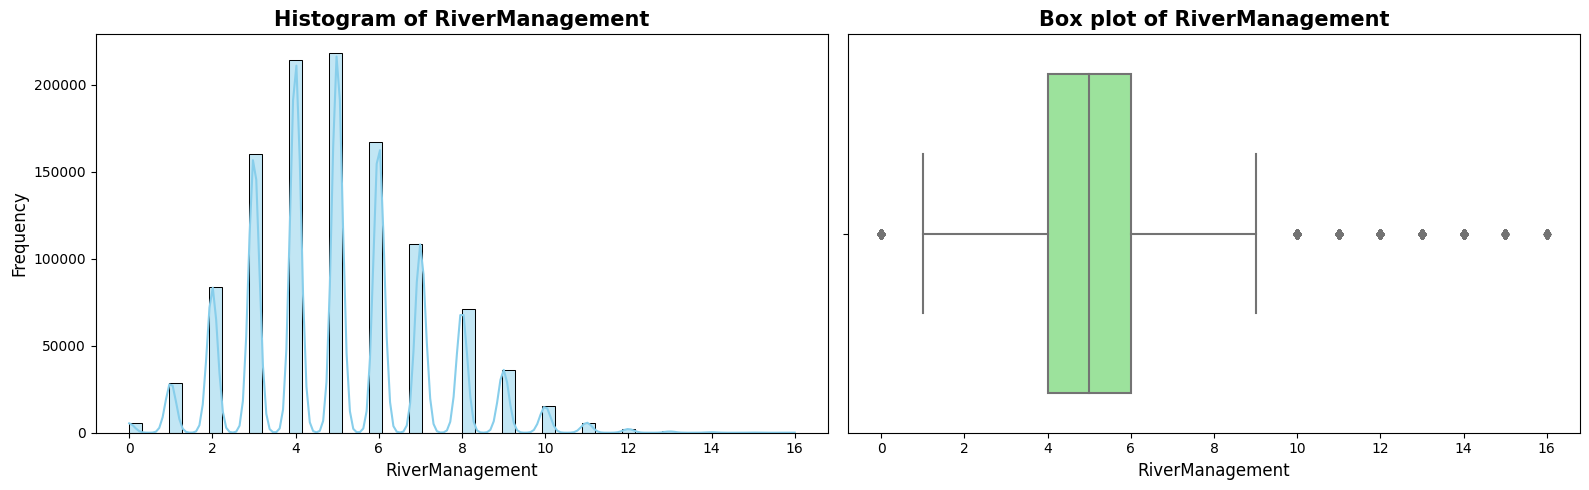

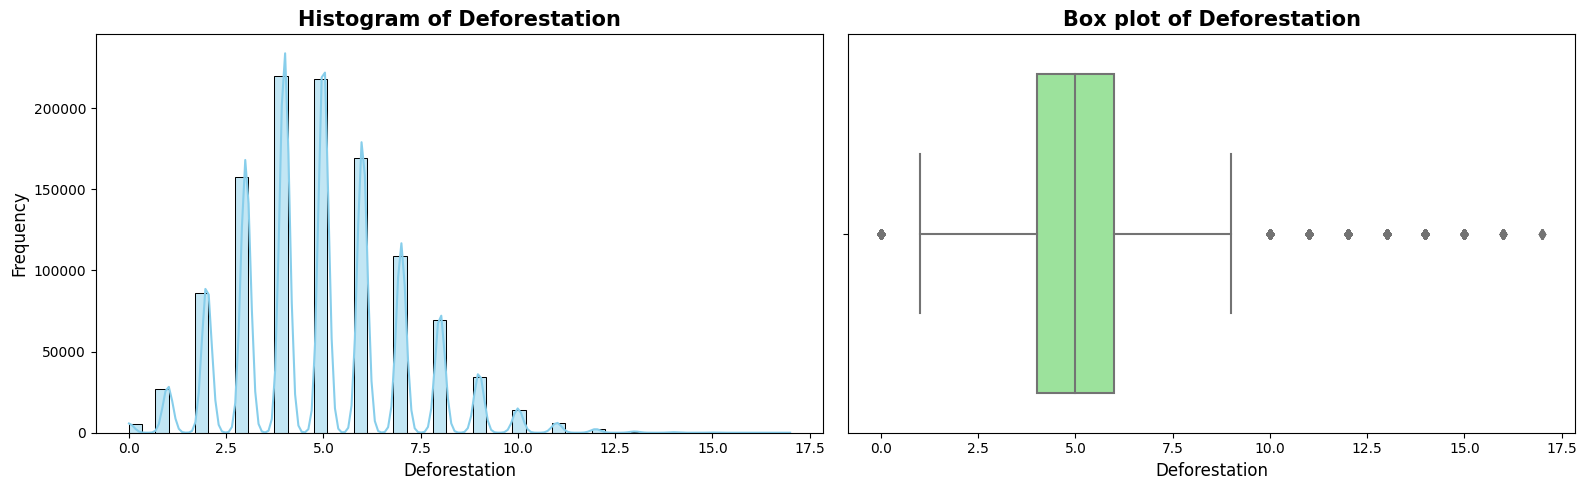

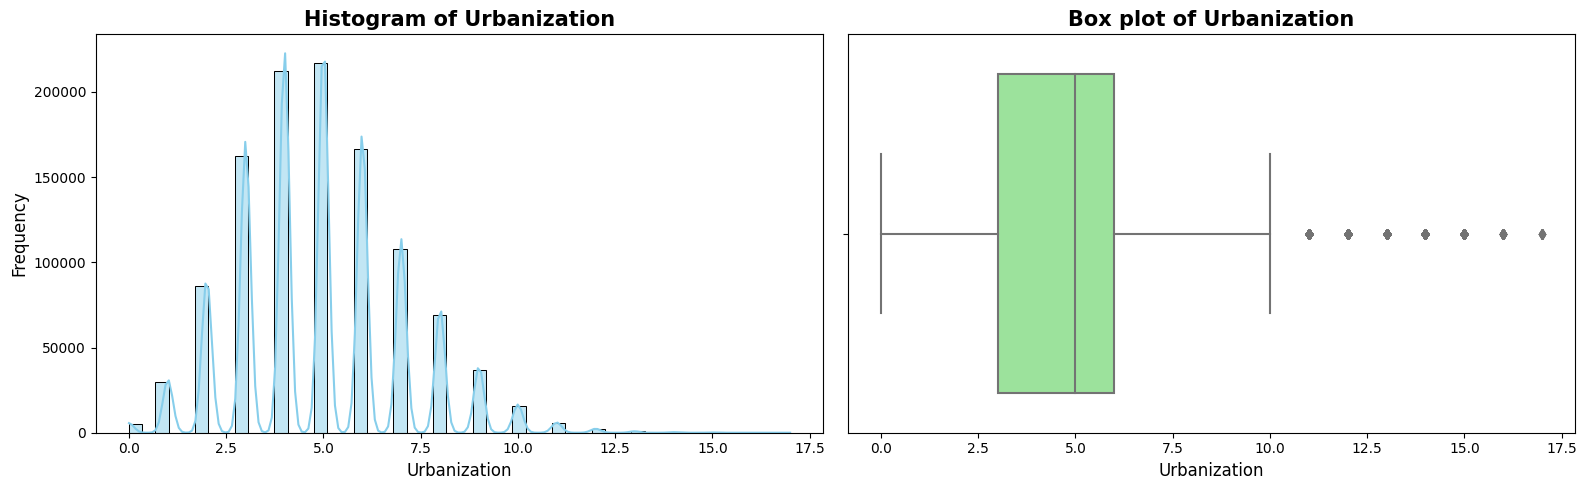

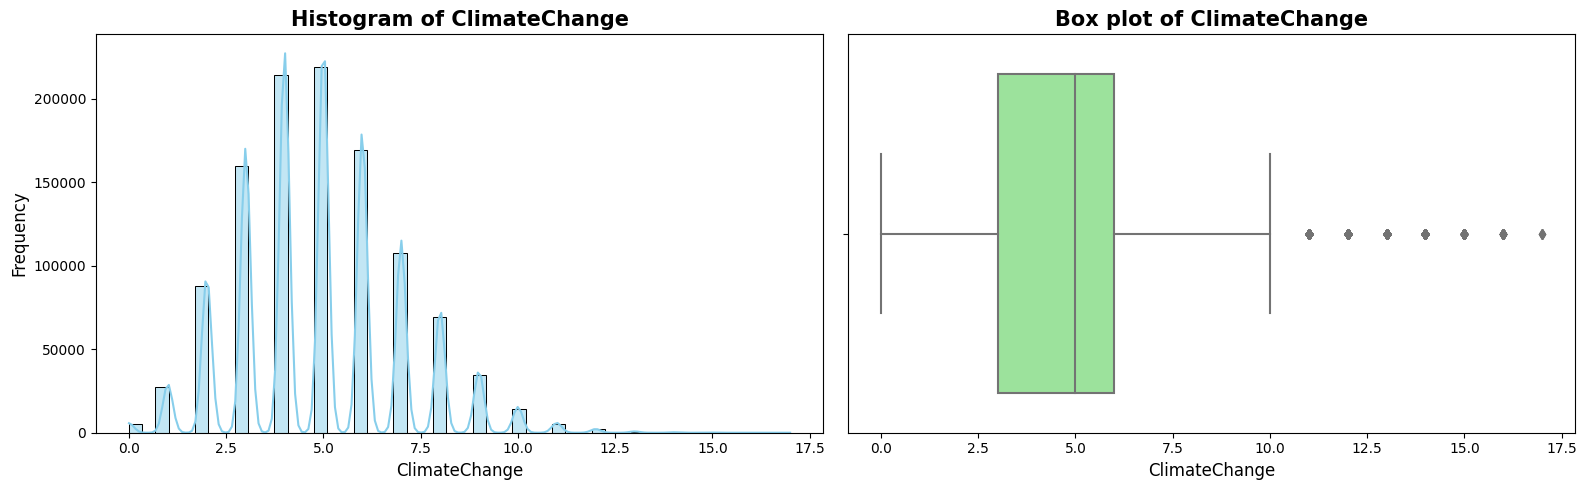

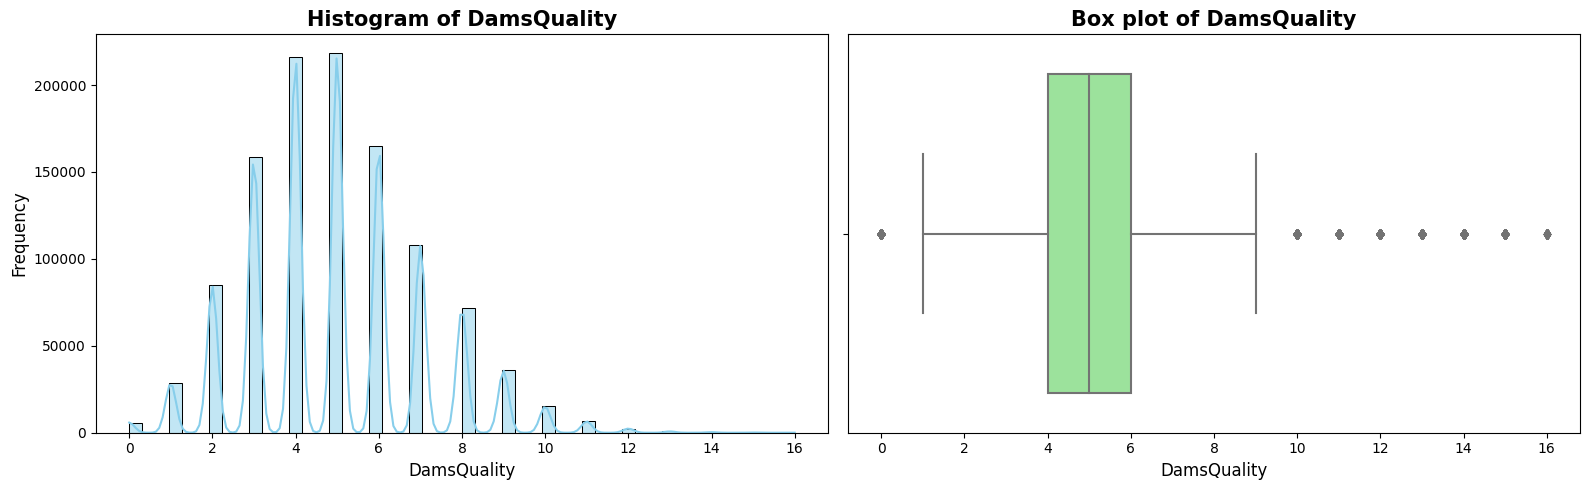

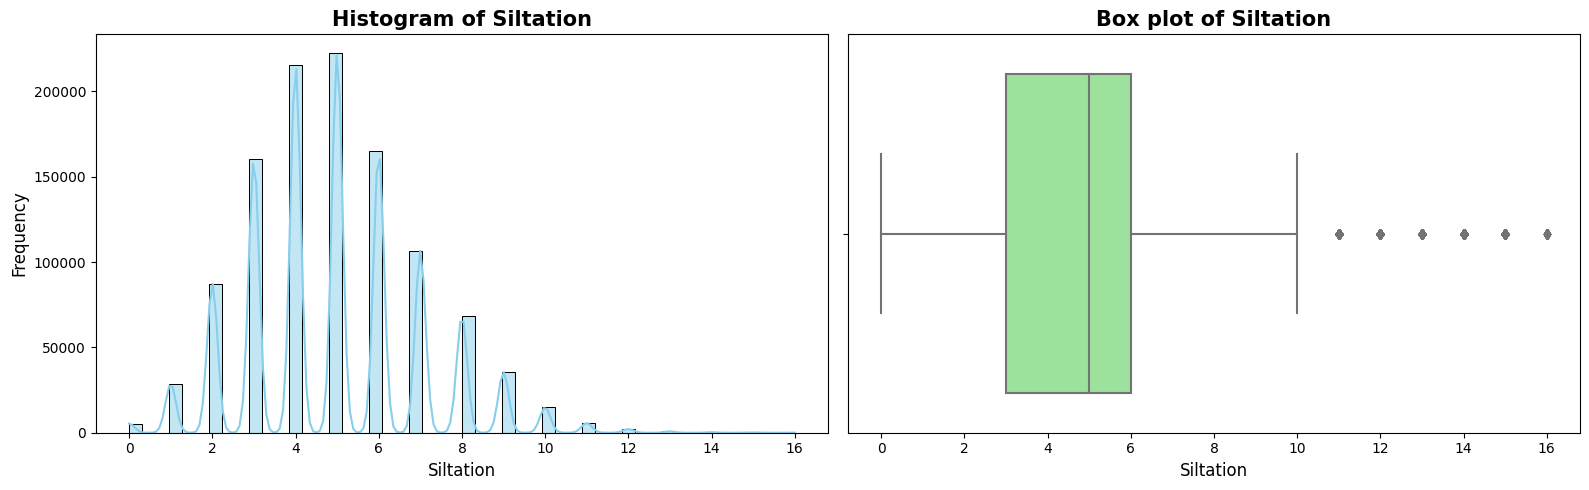

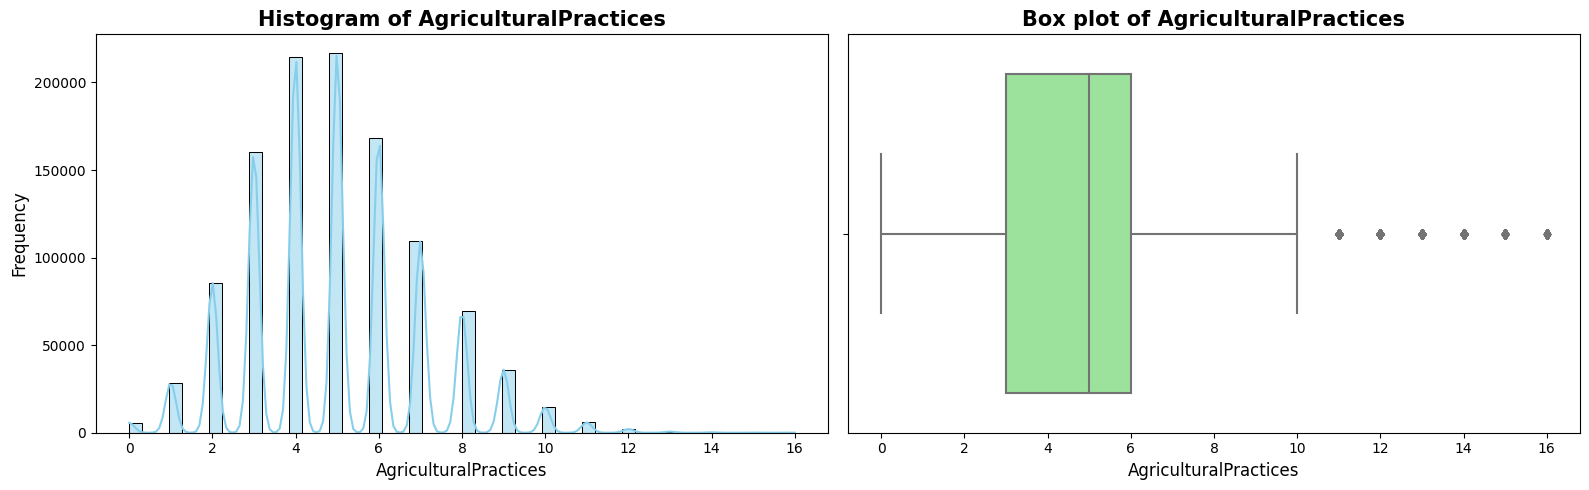

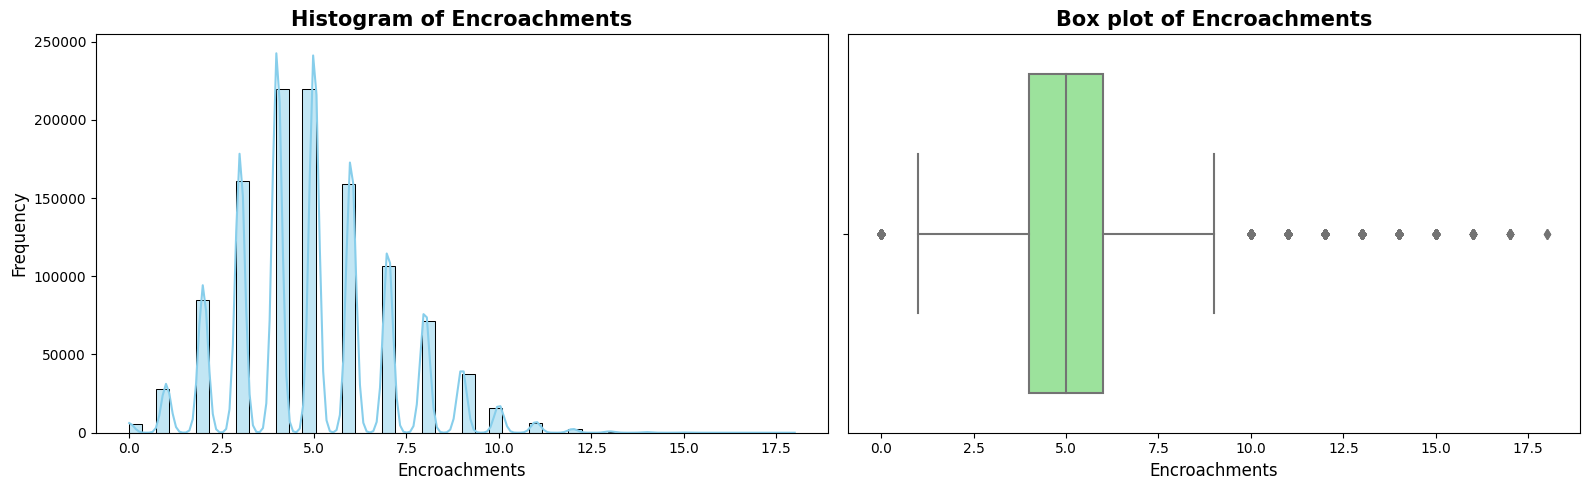

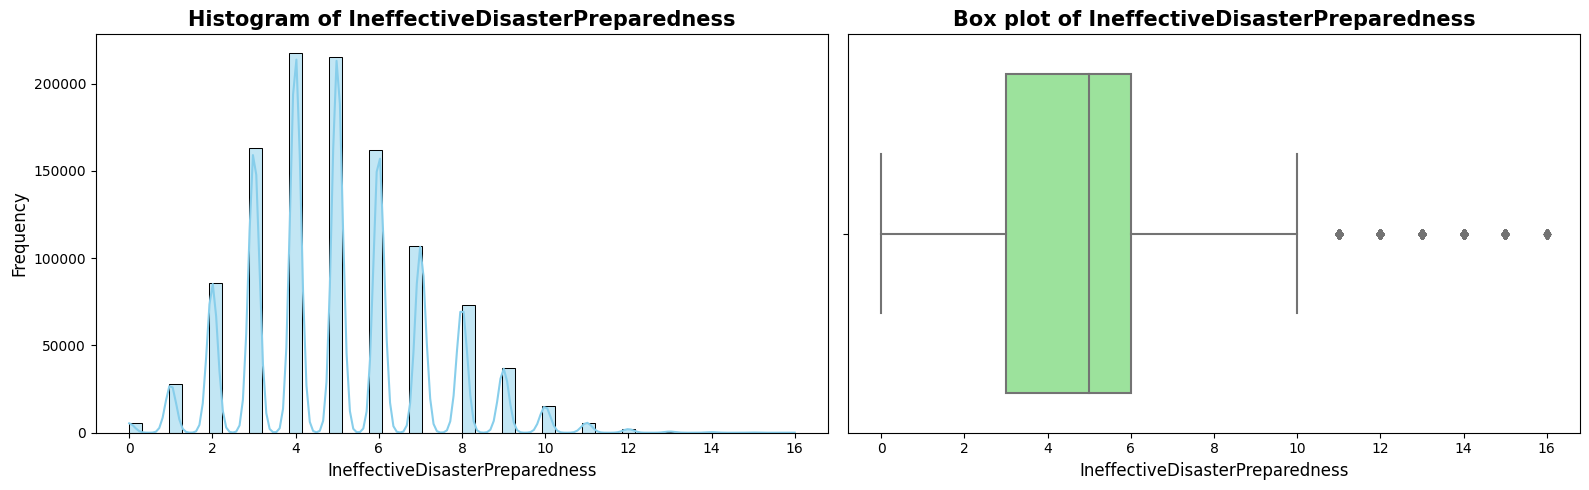

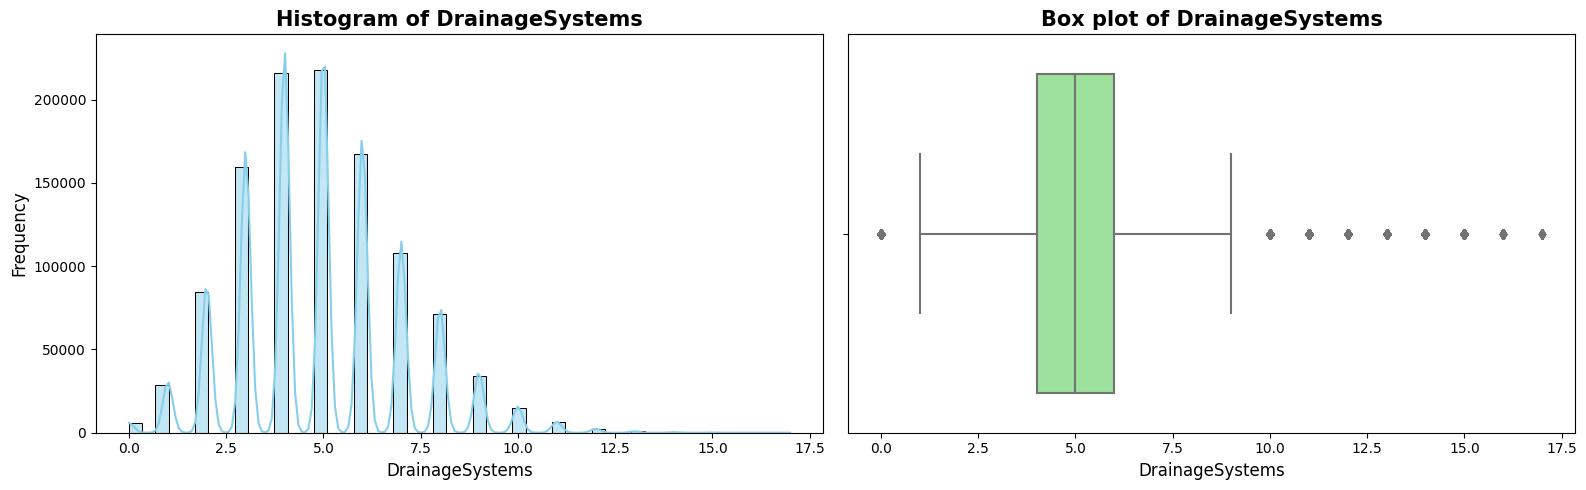

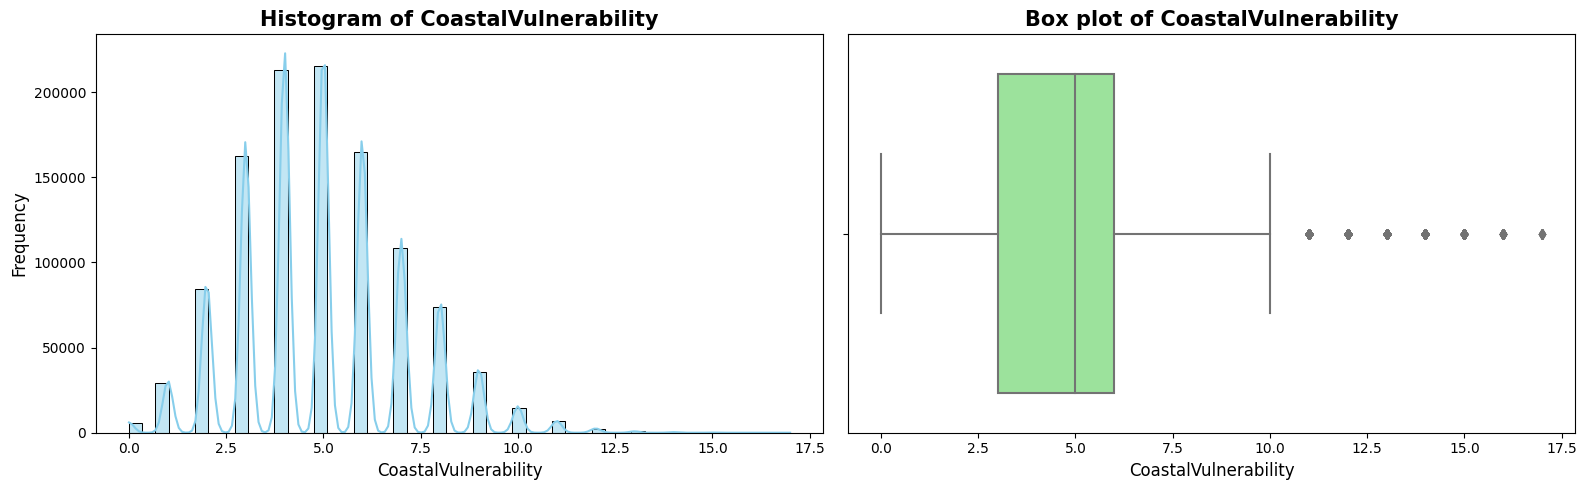

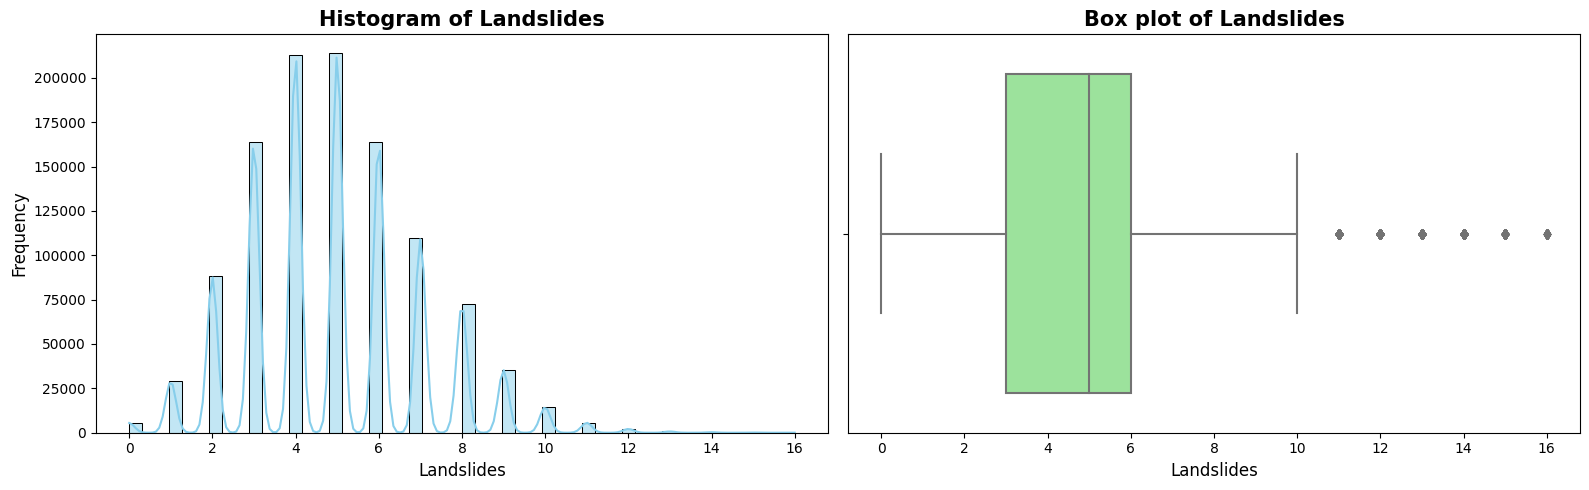

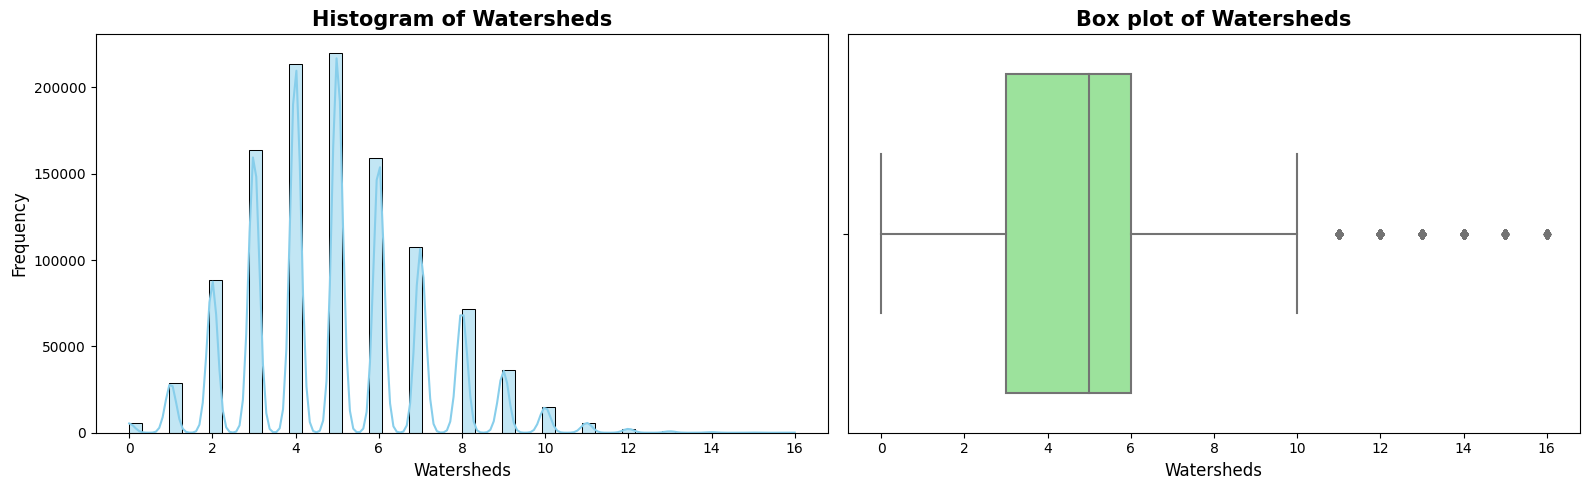

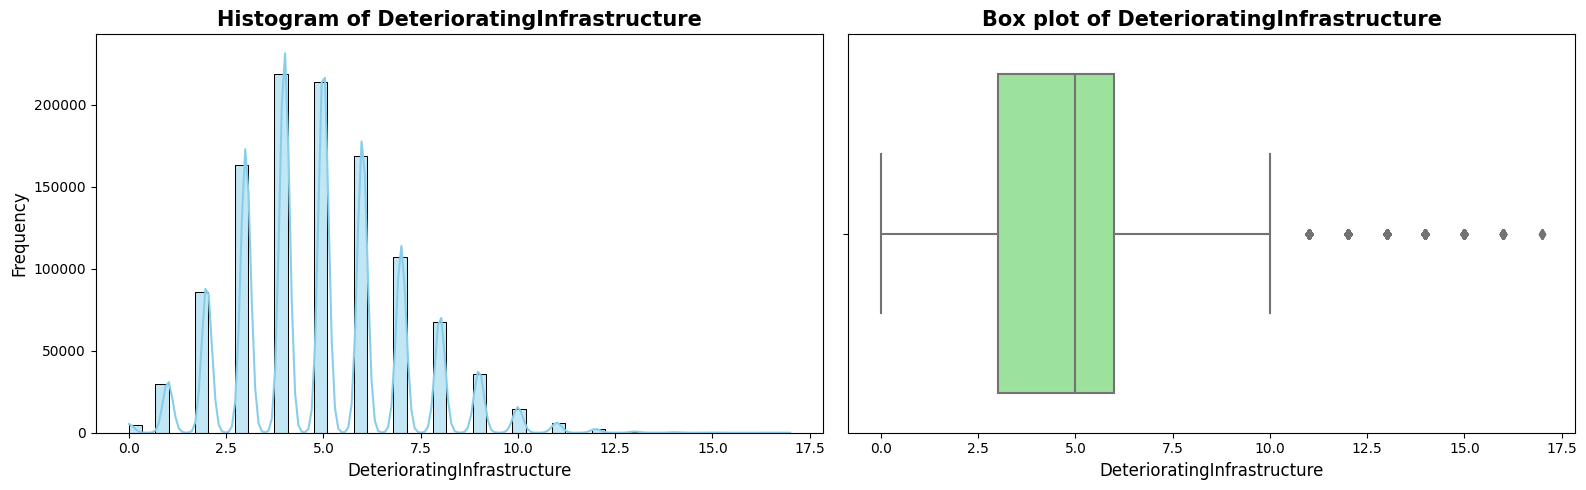

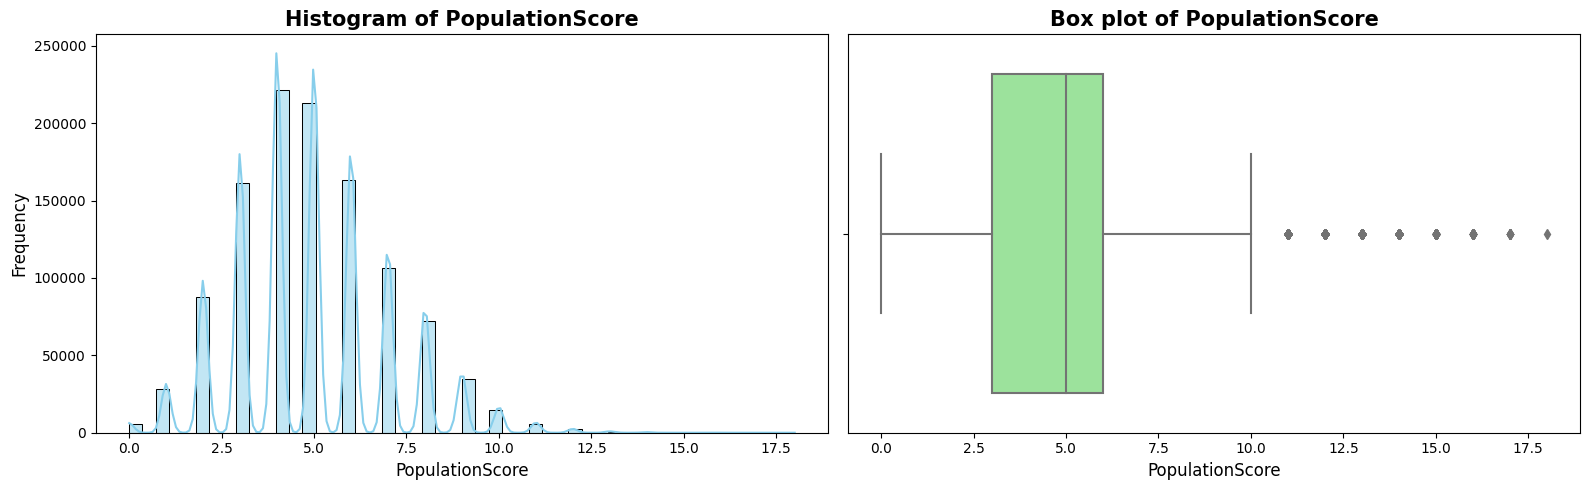

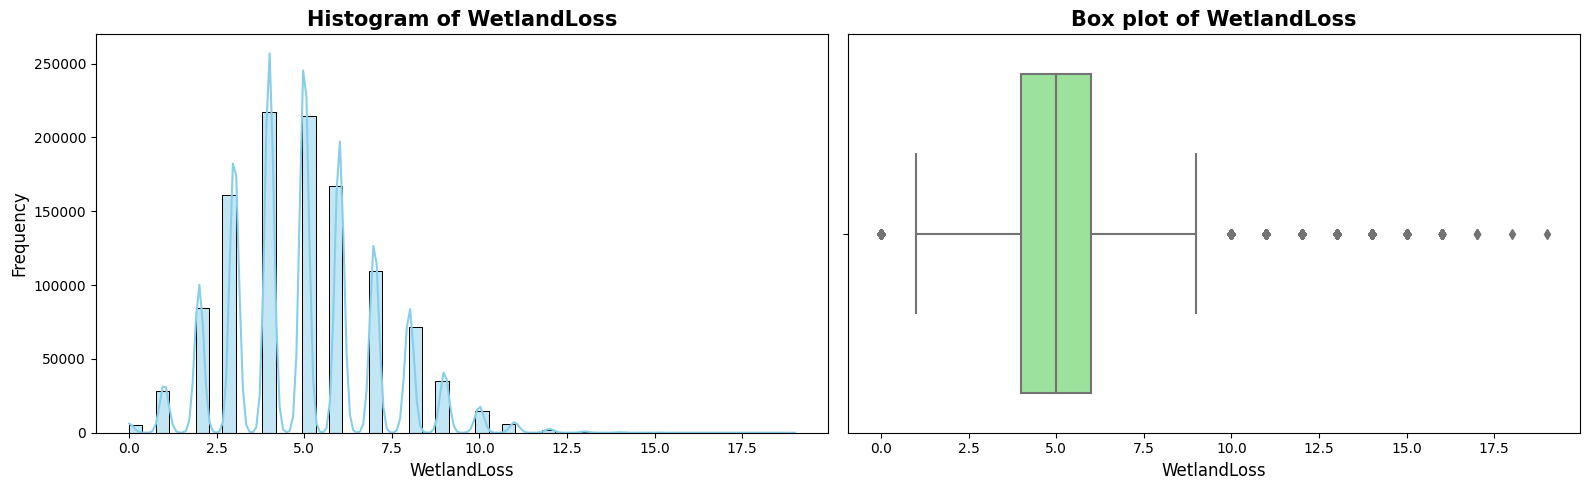

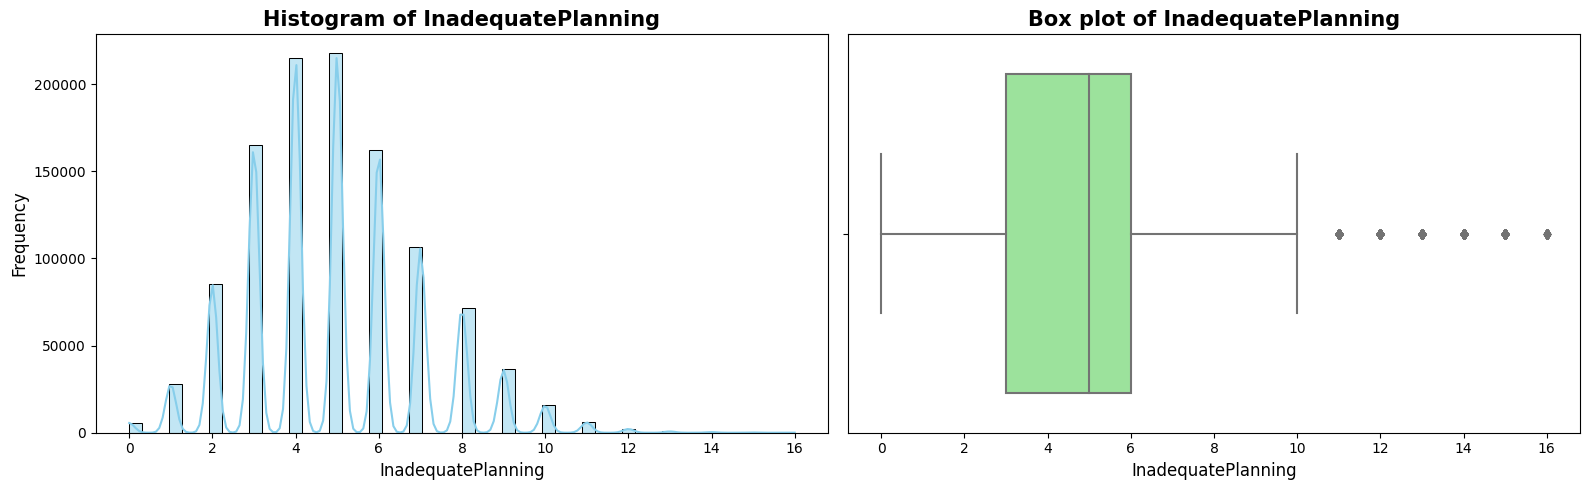

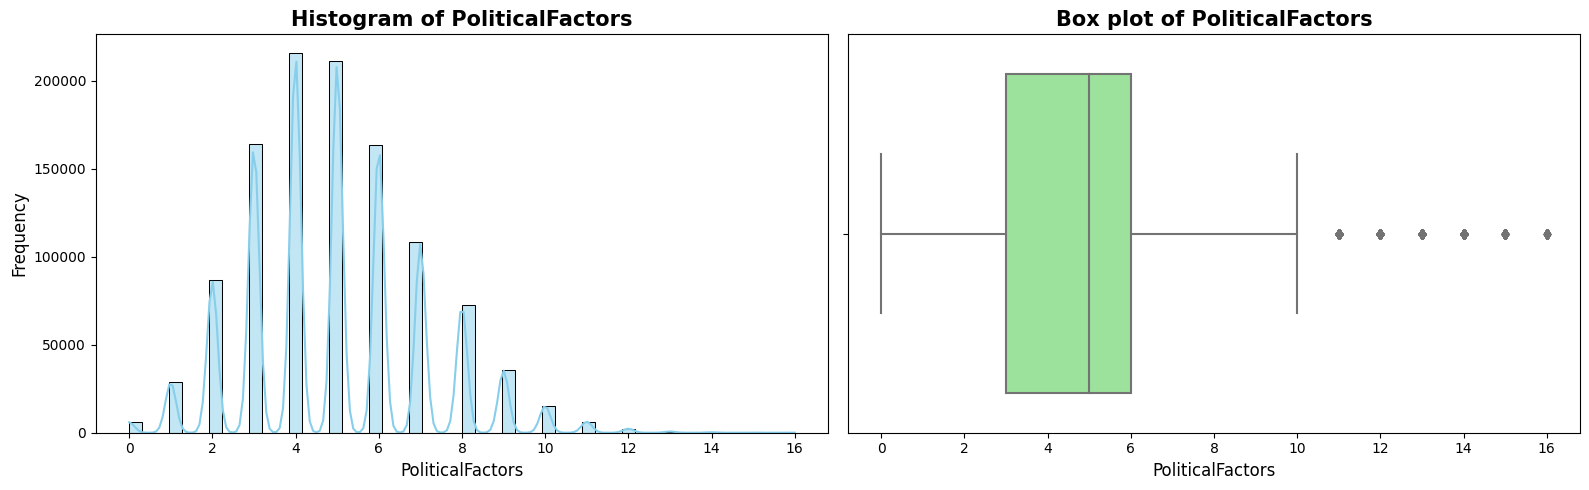

In [9]:
plot_numerics(train, cols)

As we see in diagrams data distributions corresponds to the lognormal.

There are some outliers in data en each column. All data in columns can be interpret as classes or real numbers. 

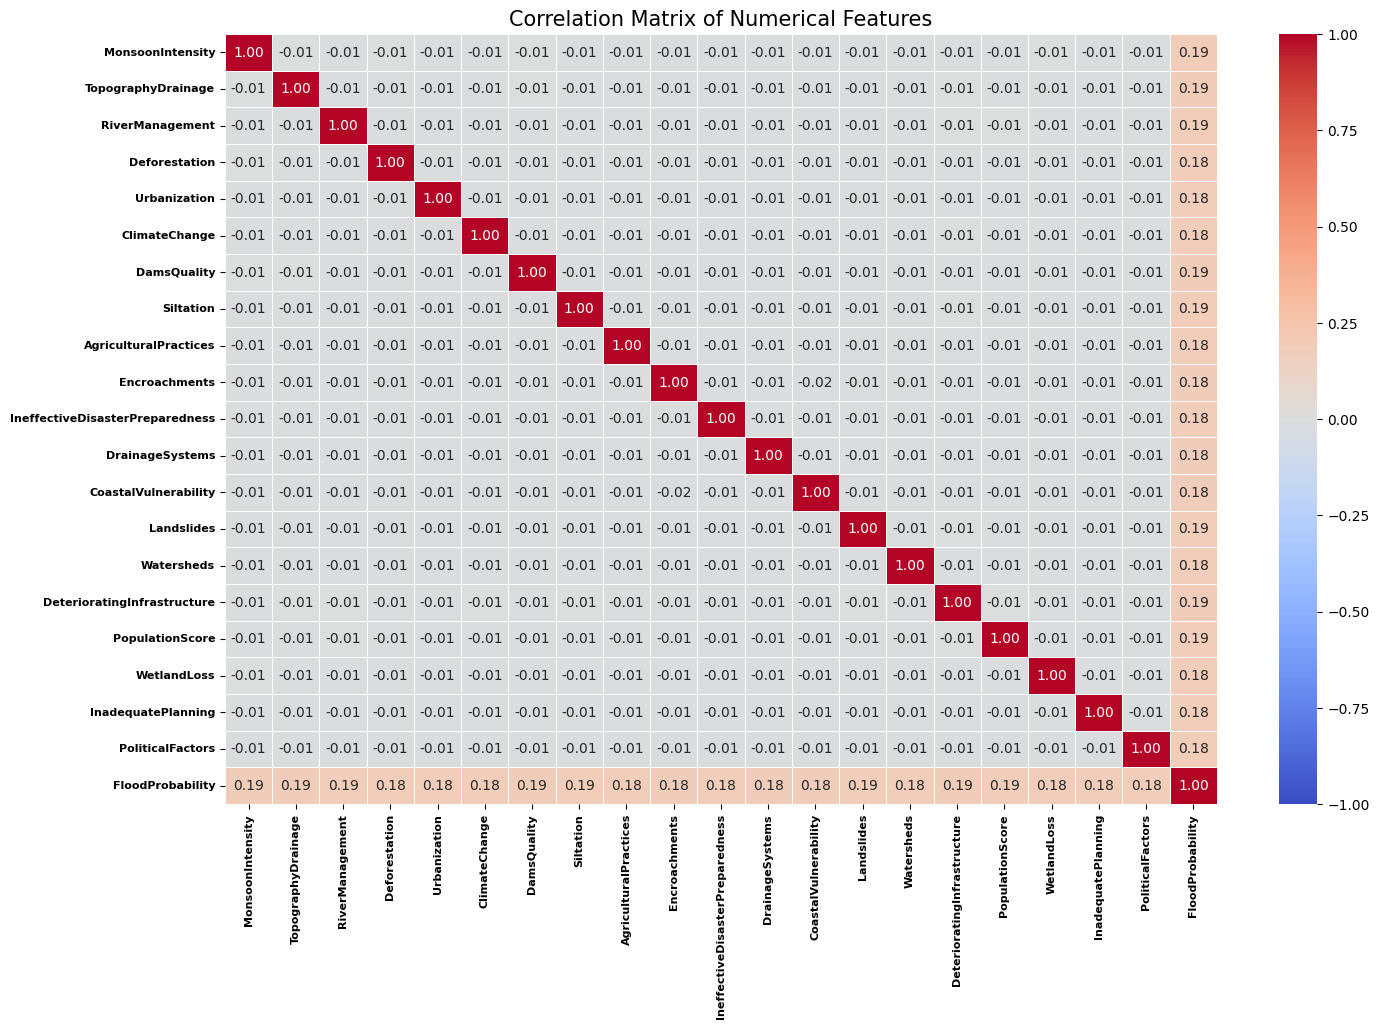

In [10]:
plt.figure(figsize=(16,10))

sns.heatmap(train[cols + ['FloodProbability']].corr(), cmap='coolwarm', vmin=-1, vmax=+1,
           linewidths=.5, annot=True, fmt='.2f')

plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.xticks(fontsize=8,fontweight='bold')
plt.yticks(fontsize=8,fontweight='bold')
plt.show()

We see no correlation betweet features.

## Feature Engineering

Feachure engineering credit to:
- https://www.kaggle.com/competitions/playground-series-s4e5/discussion/499484
- https://www.kaggle.com/code/trupologhelper/ps4e5-openfe-blending-explain

In [11]:
def generate_features(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    scaler = StandardScaler()
    
    # Feachure interaction
    df['ClimateAnthropogenicInteraction'] = (df['MonsoonIntensity']
                                             + df['ClimateChange']) * (df['Deforestation']
                                                                       + df['Urbanization']
                                                                       + df['AgriculturalPractices']
                                                                       + df['Encroachments'])

    df['InfrastructurePreventionInteraction'] = (df['DamsQuality']
                                                 + df['DrainageSystems']
                                                 + df['DeterioratingInfrastructure']) * (df['RiverManagement']
                                                                                         + df['IneffectiveDisasterPreparedness']
                                                                                         + df['InadequatePlanning'])
    # Statistic characteristics
    # df['sum'] = df[cols].sum(axis=1)
    # df['mean'] = df[cols].mean(axis=1)
    df['std'] = df[cols].std(axis=1)
    df['min'] = df[cols].min(axis=1)
    df['max'] = df[cols].max(axis=1)
    df['median'] = df[cols].median(axis=1)
    df['q_25th'] = df[cols].quantile(0.25, axis=1)
    df['q_75th'] = df[cols].quantile(0.75, axis=1)
    df['skew'] = df[cols].skew(axis=1)
    df['kurt'] = df[cols].kurt(axis=1)
    df['2ndMoment'] = df[cols].apply(lambda x: (x**2).mean(), axis=1)
    # df['3rdMoment'] = df[cols].apply(lambda x: (x**3).mean(), axis=1)
    # df['entropy'] = df[cols].apply(lambda x: -1*(x*np.log(x)).sum(), axis=1)
    # df['cv'] = df['std'] / df['mean']

    # Calculate scpicific values
    for v in range(0, 19):
        df[f'cnt_{v}'] = (df[cols] == v).sum(axis=1)

    # Harmonic and geometric mean
    # df['harmonic'] = len(df[cols].columns) / df[cols].apply(lambda x: (1/x).mean(), axis=1)
    df['geometric'] = df[cols].apply(lambda x: x.prod()**(1/len(x)), axis=1)
    
    # Quantile skewness
    df['Skewness_75'] = (df[cols].quantile(0.75, axis=1) - df[cols].mean(axis=1)) / df[cols].std(axis=1)
    df['Skewness_25'] = (df[cols].quantile(0.25, axis=1) - df[cols].mean(axis=1)) / df[cols].std(axis=1)

    # Normalization
    df[cols] = scaler.fit_transform(df[cols])
    
    return df


The next sell runs about 40 min

In [12]:
train['typ'] = 0
test['typ'] = 1
df = pd.concat([train, test], axis=0)
df = generate_features(df, cols)
print(df.shape)
df.head()

(1863262, 56)


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,cnt_12,cnt_13,cnt_14,cnt_15,cnt_16,cnt_17,cnt_18,geometric,Skewness_75,Skewness_25
0,0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,...,0,0,0,0,0,0,0,4.397569,0.314252,-0.971324
1,1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,...,0,0,0,0,0,0,0,0.000000,0.674955,-0.740273
2,2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,...,0,0,0,0,0,0,0,4.468658,0.672735,-1.009102
3,3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,...,0,0,0,0,0,0,0,4.933055,0.639633,-0.731010
4,4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,...,0,0,0,0,0,0,0,3.275062,0.932788,-0.566336


Look again on corr matrix to drop correlated features

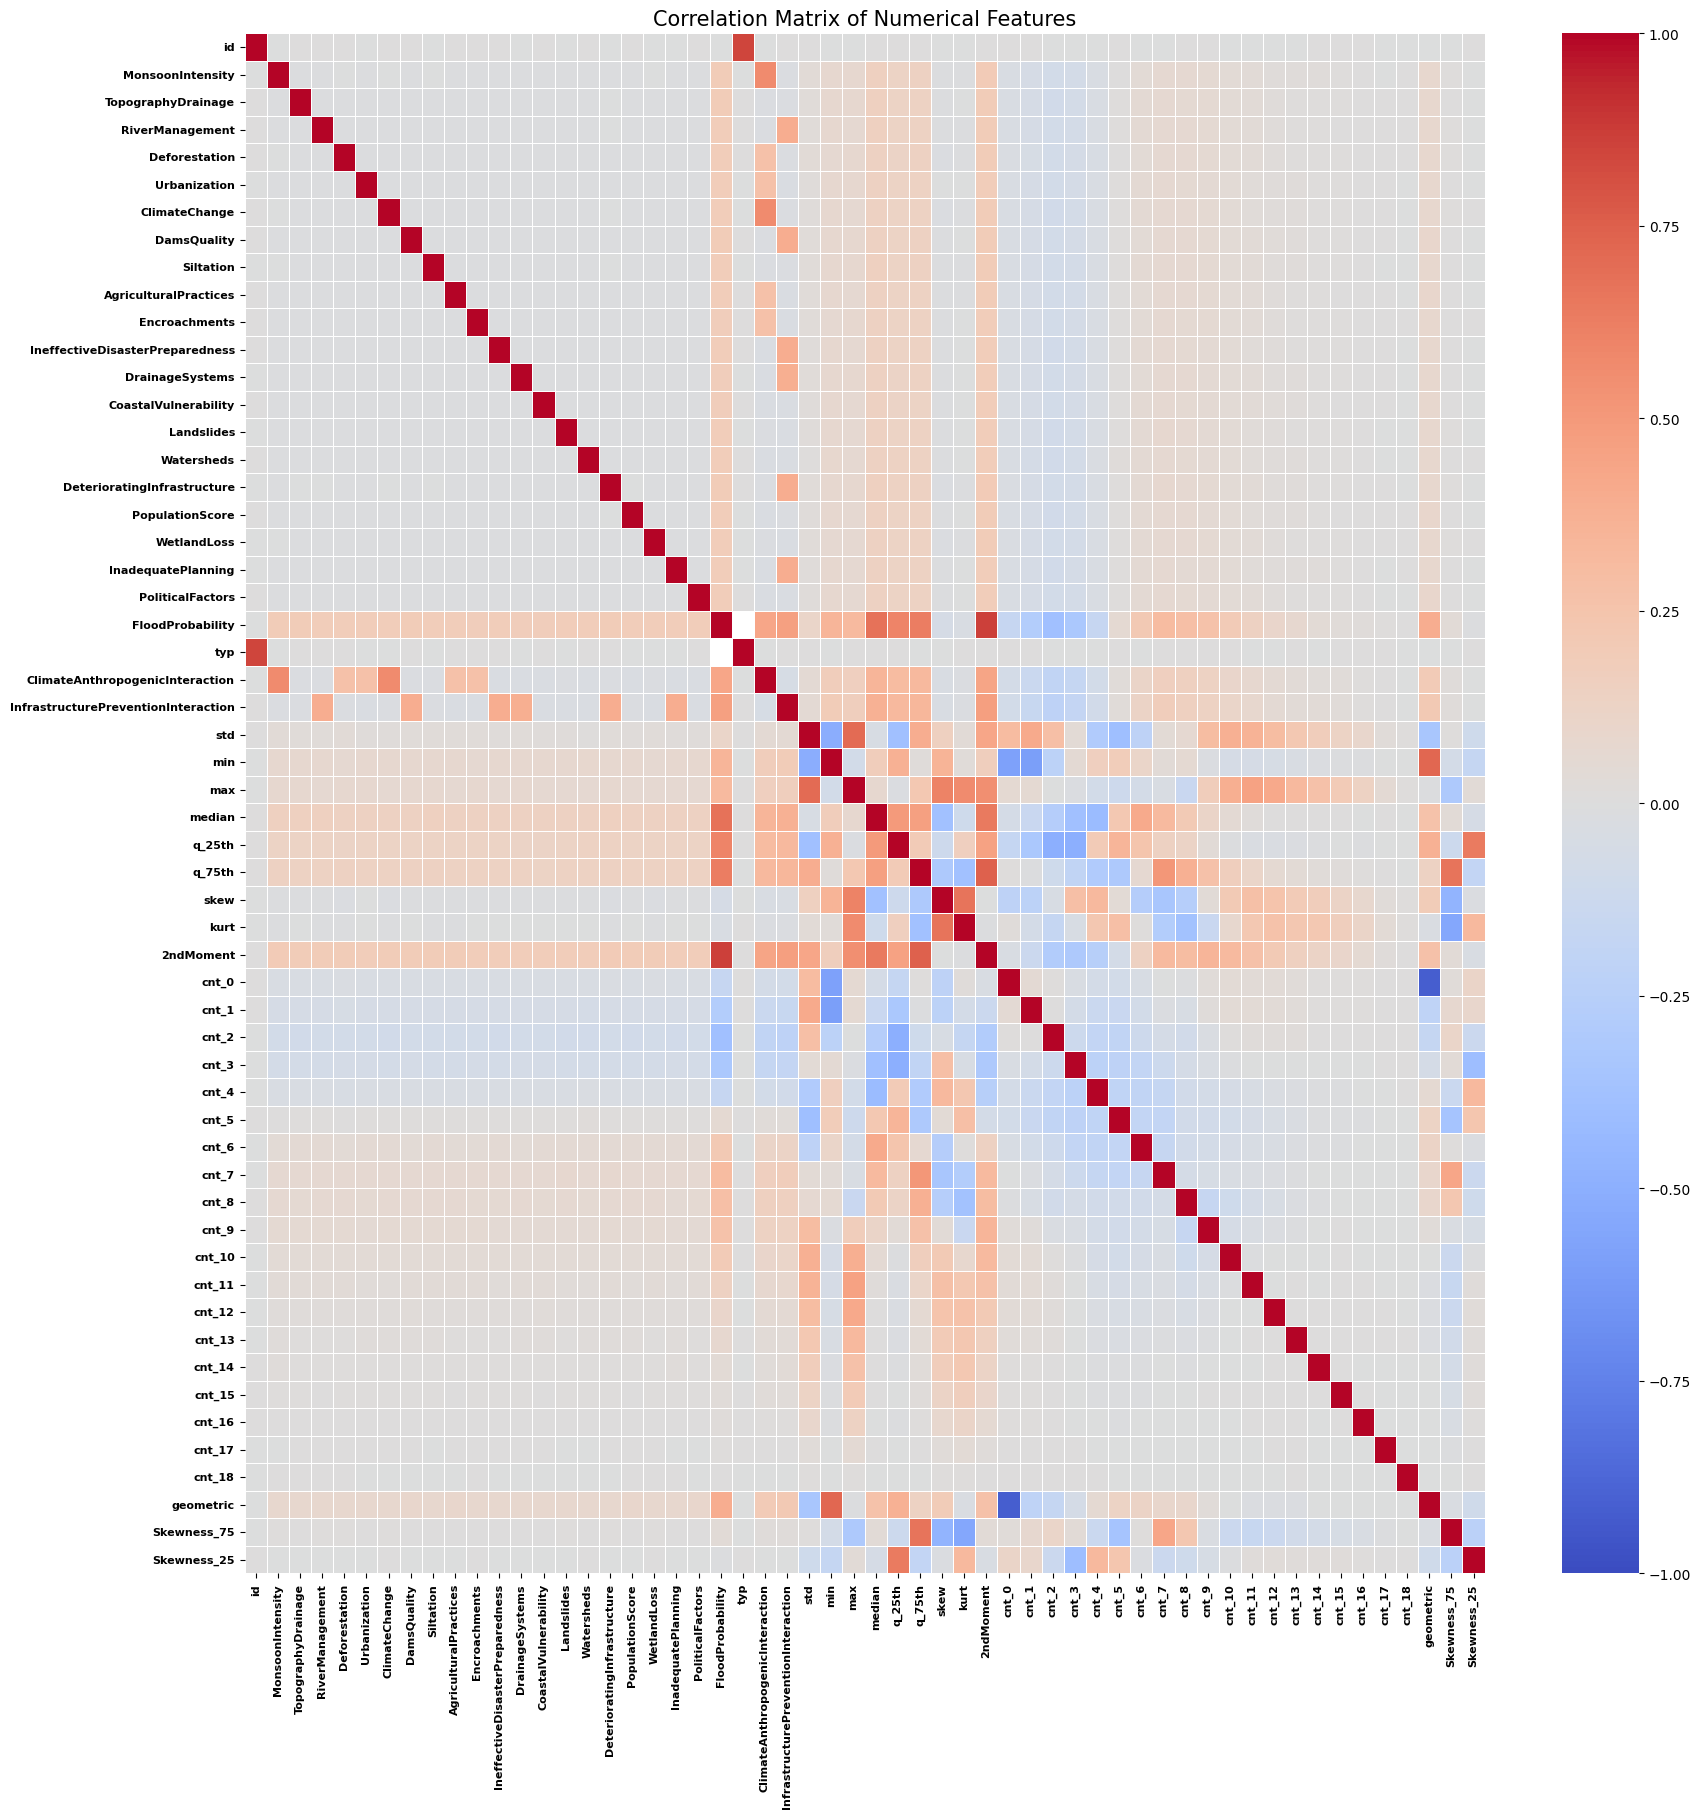

In [13]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=+1,
           linewidths=.5,)

plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.xticks(fontsize=8,fontweight='bold')
plt.yticks(fontsize=8,fontweight='bold')
plt.show()

In [14]:
# Drops redunant pairs on main diagonal
def get_redundant_pairs(data):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Return absolute max corr 
def get_top_abs_correlations(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top abs corrrelations:\n")
print(get_top_abs_correlations(df, 20))

Top abs corrrelations:

cnt_0             geometric                          0.915719
FloodProbability  2ndMoment                          0.864461
id                typ                                0.848528
q_75th            2ndMoment                          0.747773
min               geometric                          0.721073
std               max                                0.704623
FloodProbability  median                             0.673927
q_75th            Skewness_75                        0.670507
skew              kurt                               0.665411
median            2ndMoment                          0.645859
q_25th            Skewness_25                        0.632941
FloodProbability  q_75th                             0.629794
max               skew                               0.606893
FloodProbability  q_25th                             0.595957
min               cnt_1                              0.594571
                  cnt_0                       

In [15]:
df = df.drop([# 'sum', 'entropy', 'mean', 'harmonic', '3rdMoment', 'cv', 
              'cnt_0'], axis=1)

In [16]:
df_train=df[df['typ']==0]
df_test=df[df['typ']==1]
#
X=df_train.drop(['id','FloodProbability','typ'],axis=1)
y=df_train['FloodProbability']

In [17]:
train, val = train_test_split(
    df_train,
    test_size=0.25,
)

In [18]:
X_train, X_test = train.drop(['id', 'FloodProbability','typ'], axis=1), val.drop(['id', 'FloodProbability','typ'], axis=1)
y_train, y_test = train['FloodProbability'], val['FloodProbability']

In [19]:
# cat = CatBoostRegressor(iterations=10000, early_stopping_rounds=80, verbose=100, task_type='CPU', random_seed=42, custom_metric='R2', eval_metric='R2')

# cat.fit(X_train, y_train, eval_set=(X_test, y_test))

In [20]:
#test_preds = cat.predict(df_test.drop('typ', axis=1))
#val_preds = cat.predict(X_test)

In [21]:
#print(f'MSE: {mean_squared_error(y_test, val_preds)}')
#print(f'RMSE: {np.sqrt(mean_squared_error(y_test, val_preds))}')
#print(f'R2: {r2_score(y_test, val_preds)}')

In [22]:
def plot_feature_importance(importance,names,model_type):

    # Создадим списки для значений признаков и названий
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # СОздадим словарь, а потом сделаем датафрейм
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    # Отсортируем по важности
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

#plot_feature_importance(cat.feature_importances_, X_train.columns, 'Catboost')

In [23]:
# cat.get_all_params()

In [24]:
#cat_search = CatBoostRegressor(iterations=10000, early_stopping_rounds=80, 
#                               verbose=False, task_type='CPU', random_seed=42, 
#                               custom_metric='R2', eval_metric='R2')

param_grid = {
    'depth': [6, 8],
    'learning_rate': [0.035965, 0.04],
    'min_data_in_leaf': [50, 100, 500]
}

#grid_search = cat_search.grid_search(param_grid=param_grid,
#                                X=X_train, y=y_train, cv=5, plot=False, verbose=True)

In [25]:
#best_params = grid_search['params']
#best_params

In [26]:
params = {
    'depth': 8,
    'learning_rate': 0.035965,
    'min_data_in_leaf': 100
}

In [27]:
best_catboost = CatBoostRegressor(**params, 
                                   iterations=10000, early_stopping_rounds=80, verbose=100, 
                                   task_type='CPU', random_seed=42, custom_metric='R2', 
                                   eval_metric='R2')

best_catboost.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=1000, early_stopping_rounds=80, plot=False)

0:	learn: 0.0565979	test: 0.0566547	best: 0.0566547 (0)	total: 301ms	remaining: 50m 12s
1000:	learn: 0.8658775	test: 0.8646293	best: 0.8646293 (1000)	total: 3m 2s	remaining: 27m 23s
2000:	learn: 0.8686901	test: 0.8654790	best: 0.8654790 (2000)	total: 5m 57s	remaining: 23m 50s
3000:	learn: 0.8709115	test: 0.8658324	best: 0.8658331 (2995)	total: 8m 53s	remaining: 20m 44s
4000:	learn: 0.8728978	test: 0.8659975	best: 0.8659978 (3996)	total: 11m 49s	remaining: 17m 43s
Stopped by overfitting detector  (80 iterations wait)

bestTest = 0.8660822414
bestIteration = 4569

Shrink model to first 4570 iterations.


In [28]:
test_preds = best_catboost.predict(df_test.drop('typ', axis=1))
val_preds = best_catboost.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, val_preds)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, val_preds))}')
print(f'R2: {r2_score(y_test, val_preds)}')

MSE: 0.0003498326326042811
RMSE: 0.018703813317189656
R2: 0.8660822235730585


In [29]:
sample_sub['FloodProbability'] = test_preds
sample_sub.to_csv('submission.csv', index=False)
sample_sub.head()

,id,FloodProbability
0,1117957,0.576207
1,1117958,0.460473
2,1117959,0.448912
3,1117960,0.465343
4,1117961,0.466521
